3 26017.299999999992
4 25821.800000000017
5 26052.299999999992
6 26181.8
7 26313.0
8 26606.000000000004
9 26759.999999999978
10 26926.10000000001
11 27113.80000000001
12 27113.80000000001
迭代次数:  12
质心位置： [17.257800000000007, 16.052622950819668, 21.316153846153846] [0.36560000000000026, 6.441803278688523, 11.740512820512818]


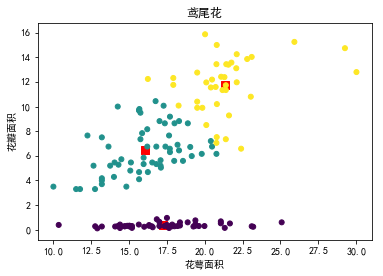

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np
#支持坐标轴中文
plt.rcParams['font.sans-serif']=['SimHei']
iris = load_iris()
X = iris.data   # 特征向量，并且是按顺序排列的
lable = iris.target  # 标签
#数据集预处理，以花萼面积为横坐标，以花瓣面积做纵坐标
arr = np.array(X)
hua_e = arr[:,0]*arr[:,1]
hua_ban = arr[:,2]*arr[:,3]
############################################
#定义需要的函数
def shuju(k):
    b =set()
    while(len(b)<k):
        b.add(np.random.randint(0,150))
    return(b)
#每个点到中心点距离距离
def  getDistance(point_x,point_y,cent_x,cent_y,k):
    x = point_x
    y = point_y
    x0 = cent_x
    y0 = cent_y
    i = 0
    j = 0
    ds = [[]for i in range(len(x))]

    while i < len(x):
        while j < k:
            M = np.sqrt((x[i]-x0[j])  * (x[i]-x0[j]) + (y[i]-y0[j]) * (y[i]-y0[j]))
            M = round(M,1)
            j = j + 1
            ds[i].append(M)
        j = 0
        i = i + 1
    return(ds)

#计算距离误差
def  EDistance(point_x,point_y,cent_x,cent_y,k):
    x = point_x
    y = point_y
    x0 = cent_x
    y0 = cent_y
    i = 0
    j = 0
    sum = 0
    while i < k:
        while j < len(x):
            M = (x[j]-x0[i])  * (x[j]-x0[i]) + (y[j]-y0[i]) * (y[j]-y0[i])
            M = round(M,1)
            sum += M
            j = j + 1
            #ds[i].append(M)
        j = 0
        i = i + 1
    return(sum)

#计算中心点
def cent(lable):
    temp = lable
    mean_x = []
    mean_y = []
    i = 0
    j = 0
    while i < 3:
        cent_x = 0
        cent_y = 0
        count = 0
        while j < len(x):
            if i == temp[j]:
                count = count + 1
                cent_x = cent_x + x[j]
                cent_y = cent_y + y[j]
            j = j + 1
        cent_x = cent_x / count
        cent_y = cent_y / count
        #更新中心点
        mean_x.append(cent_x)
        mean_y.append(cent_y)
        j = 0
        i = i + 1
    return[mean_x,mean_y]

#按照k值聚类
def julei(ds,x):
    x = x
    x = len(x)
    i = 0
    temp = []
    while i < x:
        temp.append(ds[i].index(min(ds[i])))
        i = i + 1
    return(temp)
##############################################
#主程序部分
#这里聚3类，k取3
k = 3

b = shuju(k)
ceshi_hua_e = [hua_e[i] for i in range(len(hua_e)) if (i in b)]
ceshi_hua_ban = [hua_ban[i] for i in range(len(hua_ban)) if (i in b)]
ceshi_lable = [lable[i] for i in range(len(lable)) if (i in b)]
x = hua_e
y = hua_ban
x0 = ceshi_hua_e
y0 = ceshi_hua_ban
#第一次根据随机种子聚类
n = 0
ds = getDistance(x,y,x0,y0,k)
temp = julei(ds,x)
temp1 = EDistance(x,y,x0,y0,k)
n = n + 1
center = cent(temp)
x0 = center[0]
y0 = center[1]
ds = getDistance(x,y,x0,y0,k)
temp = julei(ds,x)
temp2 = EDistance(x,y,x0,y0,k)
n = n + 1
#比较两次平方误差 判断是否相等，不相等继续迭代
while np.abs(temp2 - temp1) != 0:
    temp1 = temp2
    center = cent(temp)
    x0 = center[0]
    y0 = center[1]
    ds = getDistance(x,y,x0,y0,k)
    temp = julei(ds,x)
    temp2 = EDistance(x,y,x0,y0,k)
    n = n + 1
    print(n,temp2)
#结果可视化
print("迭代次数: ", n) # 统计出迭代次数
print('质心位置：',x0,y0)
plt.scatter(x0,y0,color='r',s=50,marker='s')
plt.scatter(x,y,c=temp,s=25,marker='o')
plt.xlabel('花萼面积')
plt.ylabel('花瓣面积')
plt.title("鸢尾花")
plt.show()